In [89]:
import lightgbm as lgb
import pandas as pd


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
import lightgbm as lgb
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


In [91]:
dev_data=pd.read_csv('Dev_data_to_be_shared.csv')

In [92]:
df=pd.DataFrame(dev_data)

In [93]:
dev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB


In [94]:
dev_data.describe()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
count,96806.000000,96806.000000,7.157500e+04,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,...,94212.0,94212.000000,94212.000000,94212.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,48403.500000,0.014173,1.542391e+05,9.570769,0.002207,4.092854,77.306435,0.006315,67.043550,0.081034,...,0.0,0.189657,0.044283,7.800673,0.588114,1.497158,0.545650,1.430491,0.121447,0.119208
std,27945.629417,0.118203,1.729925e+05,1513.967595,0.119240,301.580599,3164.987013,0.129545,2516.330899,14.203615,...,0.0,0.597298,0.369451,8.655149,1.059613,1.702795,1.055865,1.728950,0.601256,0.599697
min,1.000000,0.000000,2.500000e+04,0.000000,0.000000,0.000000,-109800.476600,0.000000,-3498.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24202.250000,0.000000,5.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,48403.500000,0.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,72604.750000,0.000000,1.810000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,11.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000
max,96806.000000,1.000000,2.800000e+06,398936.791000,25.000000,55000.000000,358986.000000,12.000000,358986.000000,3150.000000,...,0.0,18.000000,14.000000,102.000000,19.000000,38.000000,19.000000,38.000000,15.000000,15.000000


In [95]:
dev_data.isnull().sum()

account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1216, dtype: int64

In [96]:
dev_data['bad_flag'].value_counts(normalize=True)

bad_flag
0    0.985827
1    0.014173
Name: proportion, dtype: float64

In [97]:
# Assuming dev_data is already loaded
import pandas as pd

# List all columns in the dataset
columns = dev_data.columns

# Split columns into the respective groups
onus_attributes = [col for col in columns if col.startswith('onus_attributes')]
transaction_attributes = [col for col in columns if col.startswith('transaction_attribute')]

# Bureau: Columns that start with 'bureau' but not 'bureau_enquiry'
bureau_attributes = [col for col in columns if col.startswith('bureau') and not col.startswith('bureau_enquiry')]

# Bureau Enquiry: Columns that start with 'bureau_enquiry'
bureau_enquiry_attributes = [col for col in columns if col.startswith('bureau_enquiry')]

# Print the first few columns from each group to verify
print("On-us attributes:", onus_attributes[:5])  # Show top 5 for inspection
print("Transaction attributes:", transaction_attributes[:5])
print("Bureau tradeline attributes:", bureau_attributes[:5])
print("Bureau enquiry attributes:", bureau_enquiry_attributes[:5])

# Optionally, store these groups in a dictionary for easy access
attribute_groups = {
    "On-us Attributes": onus_attributes,
    "Transaction Attributes": transaction_attributes,
    "Bureau Tradeline Attributes": bureau_attributes,
    "Bureau Enquiry Attributes": bureau_enquiry_attributes
}

# Verify the number of columns in each group
for group, columns_list in attribute_groups.items():
    print(f"{group}: {len(columns_list)} columns")



On-us attributes: []
Transaction attributes: ['transaction_attribute_1', 'transaction_attribute_2', 'transaction_attribute_3', 'transaction_attribute_4', 'transaction_attribute_5']
Bureau tradeline attributes: ['bureau_1', 'bureau_2', 'bureau_3', 'bureau_4', 'bureau_5']
Bureau enquiry attributes: ['bureau_enquiry_1', 'bureau_enquiry_2', 'bureau_enquiry_3', 'bureau_enquiry_4', 'bureau_enquiry_5']
On-us Attributes: 0 columns
Transaction Attributes: 664 columns
Bureau Tradeline Attributes: 452 columns
Bureau Enquiry Attributes: 50 columns


In [98]:
dev_data.shape

(96806, 1216)

In [99]:
dev_data.columns.unique()

Index(['account_number', 'bad_flag', 'onus_attribute_1',
       'transaction_attribute_1', 'transaction_attribute_2',
       'transaction_attribute_3', 'transaction_attribute_4',
       'transaction_attribute_5', 'transaction_attribute_6',
       'transaction_attribute_7',
       ...
       'bureau_enquiry_47', 'bureau_enquiry_48', 'bureau_enquiry_49',
       'bureau_enquiry_50', 'onus_attribute_43', 'onus_attribute_44',
       'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47',
       'onus_attribute_48'],
      dtype='object', length=1216)

In [100]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent.sort_values(ascending=False))

bureau_436           100.000000
bureau_447           100.000000
bureau_449            94.124331
bureau_148            93.552053
bureau_448            90.028511
                        ...    
onus_attribute_37      0.000000
onus_attribute_38      0.000000
onus_attribute_39      0.000000
onus_attribute_40      0.000000
account_number         0.000000
Length: 1216, dtype: float64


In [101]:
df = df.dropna(axis=1, how='all')
columns_to_drop = df.columns[df.isna().all()]
print(columns_to_drop)

Index([], dtype='object')


In [102]:
df.isnull().sum()

account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1214, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X=df.drop(columns="bad_flag")
y=df["bad_flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
df.isnull().sum()

account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
onus_attribute_44          85196
onus_attribute_45          85196
onus_attribute_46          85196
onus_attribute_47          85196
onus_attribute_48          85196
Length: 1214, dtype: int64

In [106]:
# Drop columns with more than 70% missing values
threshold = 0.7 * len(df)
df = df.dropna(axis=1, thresh=threshold)



In [107]:
df.isnull().sum()

account_number                 0
bad_flag                       0
onus_attribute_1           25231
transaction_attribute_1    25231
transaction_attribute_2    25231
                           ...  
bureau_enquiry_46           2594
bureau_enquiry_47           2594
bureau_enquiry_48           2594
bureau_enquiry_49           2594
bureau_enquiry_50           2594
Length: 1191, dtype: int64

In [108]:
from sklearn.impute import SimpleImputer

# Median imputation for numerical columns
imputer = SimpleImputer(strategy='median')
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = imputer.fit_transform(df[num_cols])


In [109]:
df.isnull().sum()

account_number             0
bad_flag                   0
onus_attribute_1           0
transaction_attribute_1    0
transaction_attribute_2    0
                          ..
bureau_enquiry_46          0
bureau_enquiry_47          0
bureau_enquiry_48          0
bureau_enquiry_49          0
bureau_enquiry_50          0
Length: 1191, dtype: int64

In [111]:
df.shape

(96806, 1191)

In [112]:
from imblearn.pipeline import Pipeline  # Import the imbalanced-learn pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier as an alternative model
import lightgbm as lgb

# Preprocess with PCA (dimensionality reduction)
pca = PCA(n_components=100)  # Adjust the number of components as needed

# Define preprocessing steps directly
preprocessor = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', pca)  # PCA for dimensionality reduction
]

# Define models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # RandomForestClassifier
lgb_model = lgb.LGBMClassifier(learning_rate=0.1, max_depth=6, n_estimators=1000, random_state=42)

# Create the pipeline for RandomForest with SMOTE
rf_pipeline_with_pca = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', pca),  # PCA for dimensionality reduction
    ('smote', SMOTE(random_state=42)),  # SMOTE for balancing data
    ('model', rf_model)  # Model step
])

# Create the pipeline for LightGBM with SMOTE
lgb_pipeline_with_pca = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', pca),  # PCA for dimensionality reduction
    ('smote', SMOTE(random_state=42)),  # SMOTE for balancing data
    ('model', lgb_model)  # Model step
])

# Fit the RandomForest model
rf_pipeline_with_pca.fit(X_train, y_train)

# Fit the LightGBM model
lgb_pipeline_with_pca.fit(X_train, y_train)


/Users/ishamadlani/Desktop/conv/env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/ishamadlani/Desktop/conv/env/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/ishamadlani/Desktop/conv/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 76342, number of negative: 76342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 152684, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=100)),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 LGBMClassifier(max_depth=6, n_estimators=1000,
                                random_state=42))])

In [115]:
X_test.shape

(19362, 1213)

RandomForest Training Accuracy: 0.9960229326997573
RandomForest Test Accuracy: 0.9810969941121785


/Users/ishamadlani/Desktop/conv/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ishamadlani/Desktop/conv/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Training Accuracy: 0.9981147667992356
LightGBM Test Accuracy: 0.9706125400268567


/Users/ishamadlani/Desktop/conv/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


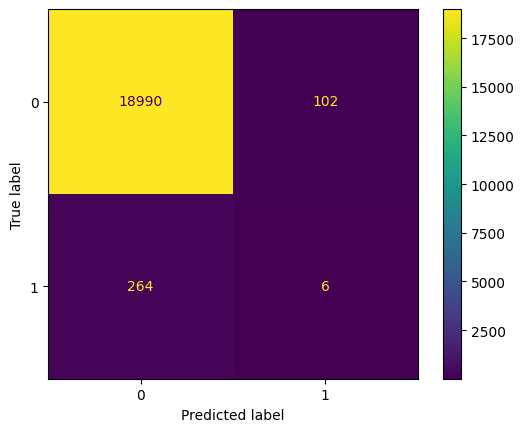

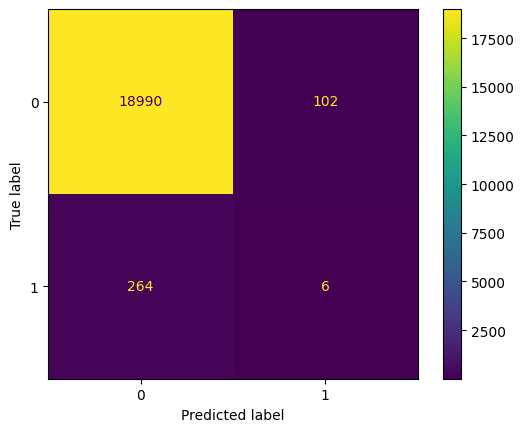

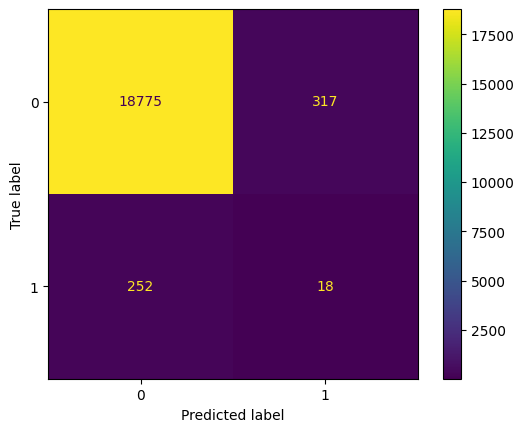

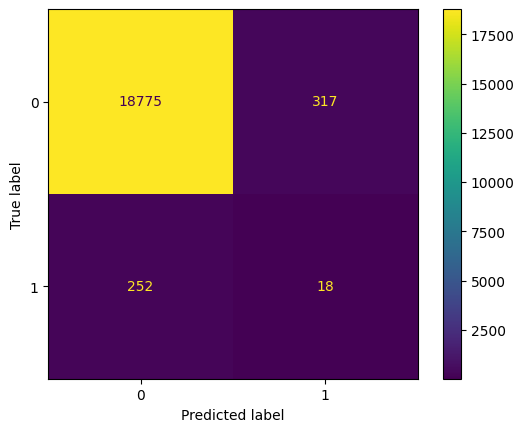

In [ ]:
# Evaluate the RandomForest model
acc_train_rf = rf_pipeline_with_pca.score(X_train, y_train)
acc_test_rf = rf_pipeline_with_pca.score(X_test, y_test)
print("RandomForest Training Accuracy:", acc_train_rf)
print("RandomForest Test Accuracy:", acc_test_rf)

# Evaluate the LightGBM model
acc_train_lgb = lgb_pipeline_with_pca.score(X_train, y_train)
acc_test_lgb = lgb_pipeline_with_pca.score(X_test, y_test)
print("LightGBM Training Accuracy:", acc_train_lgb)
print("LightGBM Test Accuracy:", acc_test_lgb)

# Display confusion matrix for RandomForest
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_pipeline_with_pca, X_test, y_test).plot()

# Display confusion matrix for LightGBM
ConfusionMatrixDisplay.from_estimator(lgb_pipeline_with_pca, X_test, y_test).plot()
